In [2]:
import torch
import os
print(os.getcwd())
gene = torch.load("./weights/g_02500000")
disc = torch.load("./weights/do_02500000")

/home/ynishimura/workspace/python/vc_tts_template/vc_tts_template/vocoder/hifigan


In [8]:
print(disc["steps"])
print(disc["epoch"])

2500000
92


In [19]:
import torch
model = torch.nn.Linear(10,10)
scheduler = torch.optim.lr_scheduler.ExponentialLR(
    torch.optim.AdamW(model.parameters(), lr=0.0002), 0.999
)
print(scheduler.state_dict())

for _ in range(92):
    scheduler.step()
print(scheduler.state_dict())

{'gamma': 0.999, 'base_lrs': [0.0002], 'last_epoch': 0, '_step_count': 1, 'verbose': False, '_get_lr_called_within_step': False, '_last_lr': [0.0002]}
{'gamma': 0.999, 'base_lrs': [0.0002], 'last_epoch': 92, '_step_count': 93, 'verbose': False, '_get_lr_called_within_step': False, '_last_lr': [0.00018241263313645436]}


/home/ynishimura/miniconda3/envs/vc_tts_template/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:128: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


In [20]:
state_dict = {
    "state_dict": {
        "netG": gene['generator'],
        "netMPD": disc['mpd'],
        "netMSD": disc['msd'],
    },
    "optimizer_state": {
        "g": disc['optim_g'],
        "d": disc['optim_d'],
    },
    "lr_scheduler_state": {
        "g": scheduler.state_dict(),
        "d": scheduler.state_dict()
    }
}

In [21]:
torch.save(state_dict, "./weights/universal.pth")

In [1]:
from scipy.io import wavfile
import numpy as np
import librosa
import os
from glob import glob
print(os.getcwd())

sampling_rate = 22050
n_fft = 1024
hop_length = 256
win_length = 1024
n_mel_channels = 80
mel_fmin = 0
mel_fmax = 8000

wav_path = "../../../../dataset/out_JSUT/JSUT/wav/*.wav"

_sr, x = wavfile.read(glob(wav_path)[0])
if x.dtype in [np.int16, np.int32]:
    x = (x / np.iinfo(x.dtype).max).astype(np.float64)
audio = librosa.resample(x, _sr, sampling_rate)

from collate_fn import mel_spectrogram
import sys
sys.path.append("../..")
from dsp import logmelspectrogram
import torch

mel_hifi = mel_spectrogram(
    y=torch.Tensor(audio).unsqueeze(0), n_fft=n_fft, num_mels=n_mel_channels, sampling_rate=sampling_rate,
    hop_size=hop_length, win_size=win_length, fmin=mel_fmin, fmax=mel_fmax
).squeeze(0).numpy()
mel_tts = logmelspectrogram(
    y=audio, sr=sampling_rate, n_fft=n_fft, hop_length=hop_length, win_length=win_length,
    n_mels=n_mel_channels, fmin=mel_fmin, fmax=mel_fmax
).T

/home/ynishimura/workspace/python/vc_tts_template/vc_tts_template/vocoder/hifigan


In [2]:
length = min(mel_hifi.shape[1], mel_tts.shape[1])

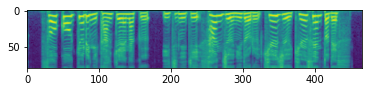

In [3]:
import matplotlib.pyplot as plt
plt.imshow(mel_hifi)

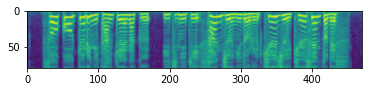

In [4]:
plt.imshow(mel_tts)

In [11]:
1e-4

0.0001